# Initialize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import sklearn.preprocessing as preprocessing
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import time
import datetime
import sys
import os

sys.path.append(os.path.abspath(os.path.join("../")))

from src.evaluate import ams_score

# Data loading (same preprocess as Bayesian LogReg)

In [7]:
df = pd.read_csv("../data/processed/df_preprocessed.csv", index_col=0)
weights =  pd.read_csv("../data/processed/weights.csv", index_col=0)
df['Weight'] = weights

# Split train test

In [8]:
data_train, data_test = train_test_split(df, test_size=0.2, random_state=42)
weights_train = data_train["Weight"]
weights_test = data_test["Weight"]
X_train = data_train.drop(["Weight", "Label"], axis=1)
X_test = data_test.drop(["Weight", "Label"], axis=1)
y_train = data_train["Label"]
y_test = data_test["Label"]

# Basic Logistic regression model

In [9]:
# Train a logistic regression model on the training set and evaluate on the test set
model = LogisticRegression(max_iter=10000)  # We need more iterations to converge
time_start = time.monotonic()
model.fit(X_train, y_train)
train_end = time.monotonic()
print(f"Training time: {str(datetime.timedelta(seconds=train_end - time_start))}")

y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]
test_end = time.monotonic()
print(f"Inference time: {str(datetime.timedelta(seconds=test_end - train_end))}")


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Training time: 0:00:05.438000
Inference time: 0:00:00.062000
Accuracy: 0.7050775618476444
Classification Report:
               precision    recall  f1-score   support

           b       0.74      0.80      0.77     84515
           s       0.64      0.55      0.59     54213

    accuracy                           0.71    138728
   macro avg       0.69      0.68      0.68    138728
weighted avg       0.70      0.71      0.70    138728



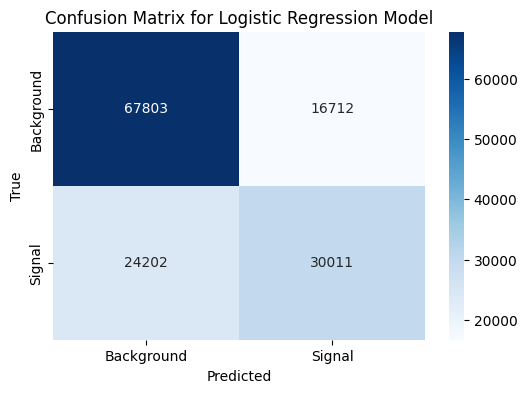

In [10]:
# Make confusion matrix
cm = confusion_matrix(y_test, y_pred)
true_positives = cm[1, 1]
false_positives = cm[0, 1]
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Background", "Signal"], yticklabels=["Background", "Signal"]
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()

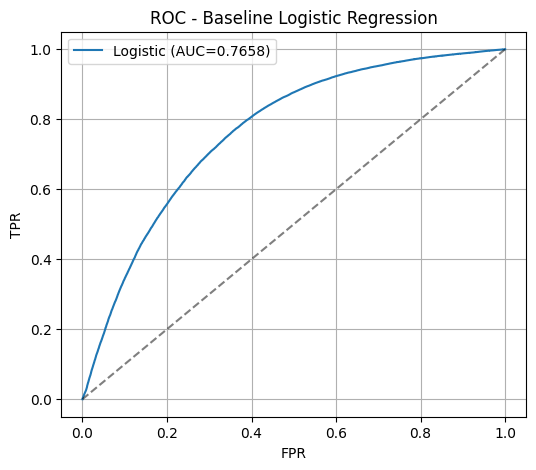

In [11]:
# ROC curve plot for baseline
fpr, tpr, _ = roc_curve(y_test, y_probs, pos_label="s")
auc = roc_auc_score(y_test, y_probs)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Logistic (AUC={auc:.4f})")
plt.plot([0, 1], [0, 1], "k--", alpha=0.5)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC - Baseline Logistic Regression")
plt.legend()
plt.grid(True)

In [12]:
ams = ams_score(y_test, y_pred, weights_test)
print("AMS Score:", ams)

AMS Score: 0.8653566816080314
